<div style="text-align: center"> <b>Data Preparation and Set Production</b></div>

In [157]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.feature
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from skimage.feature import hog
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn import svm

Loading the low resolution image data and labels

In [171]:
#loading the low resolution images and labels
image_data = np.load('DS_Xdata.npy')
image_labels = np.load('Ydata.npy')

#Checking to make sure that the number of labels match the number of images
image_data.shape[0] == image_labels.shape[0]

True

Preprocessing Land Cover Images and producing the training, validation, testing sets

In [172]:
#Shuffling the Image dataset and the labels
Image_data, Image_labels = shuffle(image_data, image_labels, random_state=42)

#Normalizing the images
normalized_images = Image_data/255.0

In [173]:
#Splitting the images into 80% training and 20% (validation + testing)
x_training, x_testing, y_training, y_testing = train_test_split(normalized_images, image_labels, test_size=0.2, random_state=42)

#Splitting the 20% sets into half validation and half testing
x_validation, x_testing, y_validation, y_testing = train_test_split(x_testing, y_testing, test_size=0.5, random_state=42)


<div style="text-align: center"> <b>Suport Vector Machine(SVM) Classification</b></div>

Importing the Libraries

In [161]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

Performing Feature extracting and training the SVM

In [165]:
#Defining a function to perform feature extraction using HOG method
def extract_features(land_cover_images):
    #performing feature extraction using HOG on each of image in the input images list
    return np.array([hog(rgb2gray(land_img), orientations=8, pixels_per_cell=(16, 16),
                         cells_per_block=(1, 1), visualize=False)
                     for land_img in land_cover_images])

#Extracting features on the training set and storing on a variable
x_training_features = extract_features(x_training)
#Extracting features on the validation set and storing on a variable
x_validation_features = extract_features(x_validation)
#Extracting features on the testing set and storing on a variable
x_testing_features = extract_features(x_testing)

#Reshaping the training array to 1D so it can be used as input for the model
y_training = np.ravel(y_training)

#Instantiating and training the SVM model
svm_model = svm.SVC(kernel='linear').fit(x_training_features, y_training)

Evaluating the SVM's performance on the validation and test sets

In [166]:
#Evaluating accuracy of the SVM model on the validation set and storing on the accuracy variable
accuracy = svm_model.score(x_validation_features, y_validation)
print("Validation Accuracy:", accuracy)

#Evaluating the accuracy of the SVM model on the testing set
test_accuracy = svm_model.score(x_testing_features, y_testing)
print("Test Accuracy:", testing_accuracy)

#Calculating the F1 score for each of the classes in the testing set and storing in variable
f1_scores = f1_score(y_testing, y_testing_predicted, average=None)

#Calculating the weighted average of the F1 scores and storing in variable
weighted_f1_score = f1_score(y_testing, y_testing_predicted, average='weighted')

#Printing the weighted F1 score for performance comparison
print("Weighted F1 score:", weighted_f1_score)


Validation Accuracy: 0.0380952380952381
Test Accuracy: 0.047619047619047616
Weighted F1 score: 0.030316465144051348


Calculating the accuracy scores for the training, validiation and testing set

In [167]:
#Generating the confusion matrix by cmomparing true class indices with the predicted ones
cm_test = confusion_matrix(y_testing, y_testing_predicted)

#Defining the list of image classes
svm_class_labels = ['agricultural', 'airplane', 'baseball diamond','beach',
           'buildings','chaparral','dense residential','forest','freeway'
           ,'golf course','harbour','intersection','medium residential','mobile home park',
           'overpass','parking lot','river','runway','sparse residential','storage tanks',
           'tennis court']

Plotting the Confusion Matrix for the SVM model

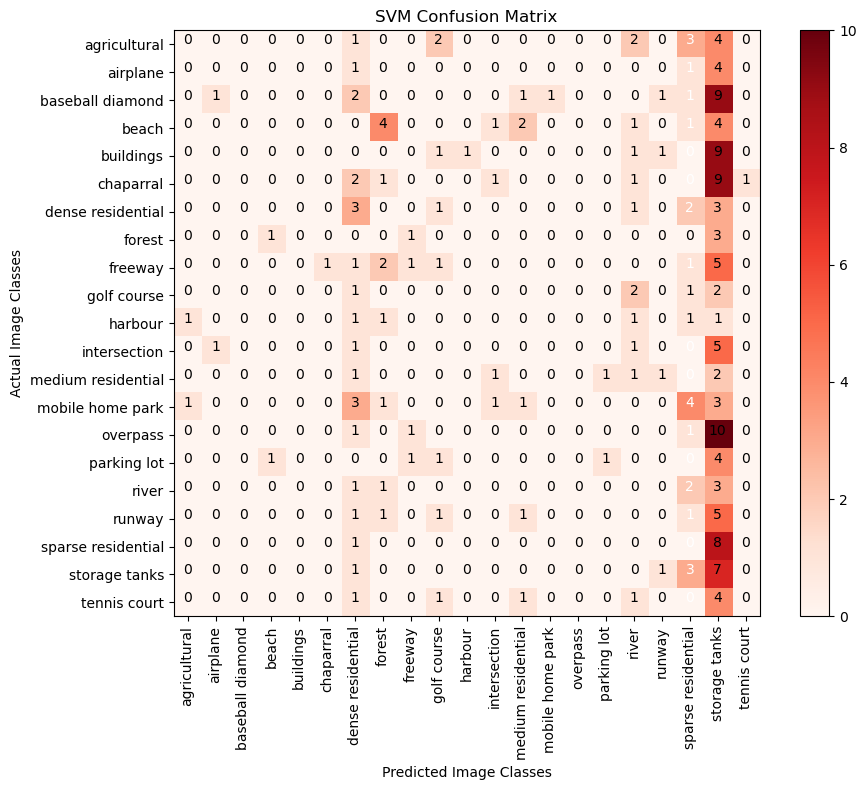

In [168]:
#Plotting the defined confusion matrix
plt.figure(figsize=(10, 8))
#Specifying the shades of blue for the colourmap
plt.imshow(cm_test, cmap=plt.cm.Reds)
plt.title('SVM Confusion Matrix')
plt.colorbar()

#Representing all the tick locations on the axes 
ticks = np.arange(len(svm_class_labels))


#Setting tick locations and labels for the x-axis and rotating the labels to prevent overlapping
plt.xticks(ticks, svm_class_labels, rotation=90)
plt.yticks(ticks, svm_class_labels)


#Adding labels to the cells of the confusion matrix 

#Creating a threshold value for the label colours. Threshould set to half of max value.
threshold_label_colours = cm_test.max() / 2
#Iterating over each cell in the confusion matrix using its shape
for i in range(cm_test.shape[0]):
    for j in range(cm_test.shape[1]):
        #Adding a text label to each cell of the matrix plot
        plt.text(j, i, format(cm_test[i, j], 'd'),
                 horizontalalignment="center",

                 color="white" if confusion_mat[i, j] > threshold_label_colours else "black")
#Labelling the axis and displaying the plot
plt.xlabel('Predicted Image Classes')
plt.ylabel('Actual Image Classes')
plt.tight_layout()
plt.show()

<div style="text-align: center"> <b>Convolutional Neural Network(CNN) Classification</b></div>

Importing the Libraries

In [178]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix


Defining the CNN model

In [175]:
#Defining the input layer
cnn_inputs = Input(shape=x_training.shape[1:])

#Defining the convolutional layers and the max poolying layers 
x = Conv2D(32, (3, 3), activation='relu')(cnn_inputs)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)

#Flattening fully connected layers
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
cnn_outputs = Dense(21, activation='softmax')(x)

#Creating the cnn model by specifying the input and output layers
cnn_model = Model(inputs=cnn_inputs, outputs=cnn_outputs)

#Compiling the model using the adam optimizer, loss function and accuracy as the evaluation metric
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Training the model using the testing data for 10 epochs and validating using validation data
model_history = cnn_model.fit(x_training, y_training, epochs=10, validation_data=(x_validation, y_validation))

#Evaluating model performance performnace using the testing data
test_loss, test_acc = cnn_model.evaluate(x_testing, y_testing)

print('Test accuracy:', test_accuracy)

Epoch 1/10
53/53 [==============================] - 5s 72ms/step - loss: 3.0517 - accuracy: 0.0411 - val_loss: 3.0451 - val_accuracy: 0.0238
Epoch 2/10
53/53 [==============================] - 3s 66ms/step - loss: 3.0446 - accuracy: 0.0470 - val_loss: 3.0456 - val_accuracy: 0.0238
Epoch 3/10
53/53 [==============================] - 3s 65ms/step - loss: 3.0449 - accuracy: 0.0470 - val_loss: 3.0460 - val_accuracy: 0.0238
Epoch 4/10
53/53 [==============================] - 3s 63ms/step - loss: 3.0446 - accuracy: 0.0476 - val_loss: 3.0462 - val_accuracy: 0.0238
Epoch 5/10
53/53 [==============================] - 3s 62ms/step - loss: 3.0441 - accuracy: 0.0512 - val_loss: 3.0463 - val_accuracy: 0.0238
Epoch 6/10
53/53 [==============================] - 3s 64ms/step - loss: 3.0448 - accuracy: 0.0500 - val_loss: 3.0460 - val_accuracy: 0.0238
Epoch 7/10
53/53 [==============================] - 3s 63ms/step - loss: 3.0448 - accuracy: 0.0458 - val_loss: 3.0457 - val_accuracy: 0.0381
Epoch 8/10
53

Calculating the accuracy scores for the training, validiation and testing set

In [179]:
#Calculating the accuracy score for the training set by comparing true labels with the obtained predictions on training set
training_accuracy = accuracy_score(y_training, np.argmax(cnn_model.predict(x_training), axis=1))

#Calculating the accuracy score for the validation set
validation_accuracy = accuracy_score(y_validation, np.argmax(cnn_model.predict(x_validation), axis=1))

#Calculating the accuracy score for the testing set
testing_accuracy = accuracy_score(y_testing, np.argmax(cnn_model.predict(x_testing), axis=1))

#Calculating the confusion matrix for the testing 
confusion_mat = confusion_matrix(y_testing, np.argmax(cnn_model.predict(x_testing), axis=1))

7/7 [==============================] - 0s 17ms/step


Generating predictions for the testing set using the CNN model

In [180]:

#Generating predictions for the testing set
y_testing_predictions = cnn_model.predict(x_testing)

#Determining the numner of classes in the dataset 
num_classes = len(np.unique(image_labels))

#Converting the class labels of the testing set into one-hot encoding
y_testing_encoded = tf.keras.utils.to_categorical(y_testing, num_classes)

#Converting the  predicted class labels to class indices and storing them in variable
y_testing_predicted_indices = np.argmax(y_testing_predictions, axis=1)
y_testing_indices = np.argmax(y_testing_encoded, axis=1)

#Generating the confusion matrix by cmomparing true class indices with the predicted ones
cnn_confusion_mat = confusion_matrix(y_testing_indices, y_testing_predicted_indices)

#Defining the list of image classes
cnn_class_labels = ['agricultural', 'airplane', 'baseball diamond','beach',
           'buildings','chaparral','dense residential','forest','freeway'
           ,'golf course','harbour','intersection','medium residential','mobile home park',
           'overpass','parking lot','river','runway','sparse residential','storage tanks',
           'tennis court']



7/7 [==============================] - 0s 21ms/step


Plotting the Confusion Matrix for the CNN model

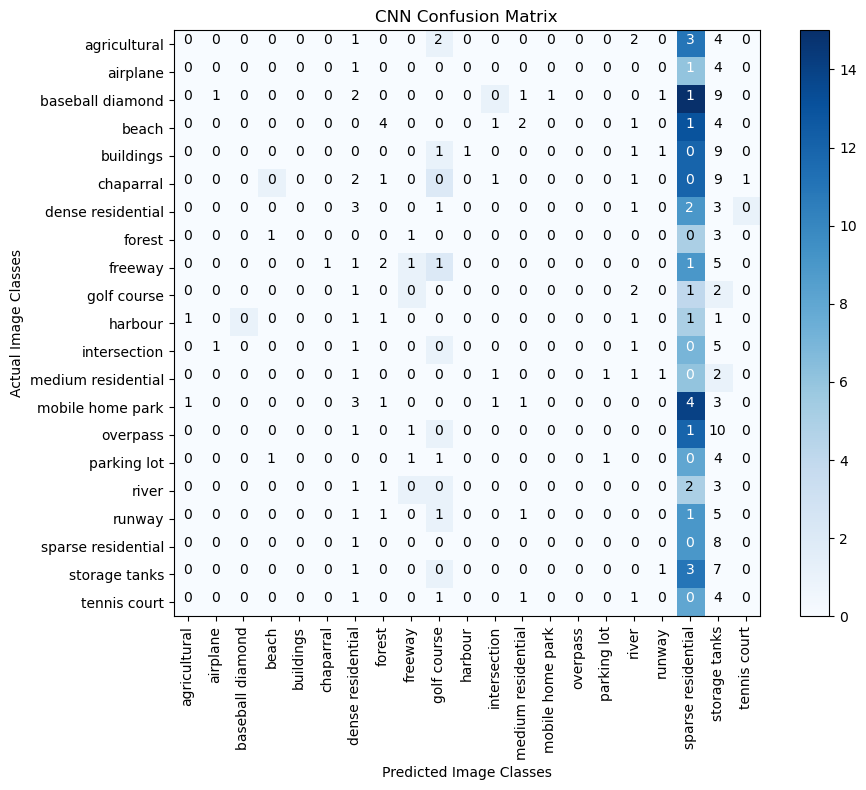

In [181]:
#Plotting the defined confusion matrix
plt.figure(figsize=(10, 8))
#Specifying the shades of blue for the colourmap
plt.imshow(cnn_confusion_mat, cmap=plt.cm.Blues)
plt.title('CNN Confusion Matrix')
plt.colorbar()

#Representing all the tick locations on the axes 
ticks = np.arange(len(class_labels))

#Setting tick locations and labels for the x-axis and rotating the labels to prevent overlapping
plt.xticks(ticks, cnn_class_labels, rotation=90)
plt.yticks(ticks, cnn_class_labels)


#Adding labels to the cells of the confusion matrix 

#Creating a threshold value for the label colours. Threshould set to half of max value.
max_label_colour = cm_test.max() / 2
#Iterating over each cell in the confusion matrix using its shape
for i in range(cm_test.shape[0]):
    for j in range(cm_test.shape[1]):
        #Adding a text label to each cell of the matrix plot
        plt.text(j, i, format(cm_test[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cnn_confusion_mat[i, j] > max_label_colour else "black")
                 
#Labelling the axis and displaying the plot
plt.xlabel('Predicted Image Classes')
plt.ylabel('Actual Image Classes')
plt.tight_layout()
plt.show()